# Predictive model using Different Algorithms

In this notebook we finally begin our path for prediction. We have considered mainly three algothirms for our regression problem mainly:
* Linear Regression
* Decision Tree Regression
* Random Forest Regression


In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error


import warnings
# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# display all columns
pd.set_option('display.max_columns', None)

In [2]:
# load data
df = pd.read_csv("data/data_final.csv",index_col=False)

### Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [3]:
#create feature (x) and target (y) variables
x = df.drop("Price", axis=1)
Y = df["Price"].copy()

In [4]:
#feature scaling using robust scaler
scaler = RobustScaler()
df = scaler.fit_transform(df.astype(np.float64))

In [5]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size = .20)

Let us create the instances for all the selected models.

In [6]:
#create instance
tree = DecisionTreeRegressor()
forest = RandomForestRegressor(n_jobs=-1)
linear = LinearRegression(n_jobs=-1)

We fit our data without any hypertuning.

In [7]:
#fit data into model
tree.fit(x_train, Y_train)
forest.fit(x_train, Y_train)
linear.fit(x_train, Y_train)

LinearRegression(n_jobs=-1)

Lets predict and compare the root mean square error.

In [8]:
models= [('linear regression', linear), ('random forest', forest), ('decision tree', tree)]
for i, model in models:    
    prediction = model.predict(x_train)
    MSE = mean_squared_error(Y_train, prediction)
    RMSE = np.sqrt(MSE)
    print('RMSE :', i, "=",'{}'.format(round(RMSE, 2)))

RMSE : linear regression = 444476.81
RMSE : random forest = 185241.68
RMSE : decision tree = 112830.35


Since RMSE (root mean square error) is data dependent, we need a human understandable format to assess our model. Hence we use Mean absolute Percentage Error.

In [9]:
for i, model in models:
    predictions = model.predict(x_train)
    errors = abs(predictions - Y_train)
    mape = np.mean(100 * (errors / Y_train))
    accuracy = 100 - mape    
    print('Accuracy :', i,"=",'{}'.format(round(accuracy, 2)),"%")

Accuracy : linear regression = 70.99 %
Accuracy : random forest = 89.61 %
Accuracy : decision tree = 97.39 %


__Observations:__

After analyzing the above result it seems that decision tree performs the best in terms of accuracy, also the RMSE is the lowest. At this point we have only predicted on the training set so therefor the chances of overfitting is high. We need to compare the models using cross validation to find the true potential.

### Comparing Models

In [10]:
models= [('linear regression', linear), ('random forest', forest), ('decision tree', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, Y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

Lets prepare a structure for comparision

In [11]:
# Linear Regression
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

# Random Forest
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

# Decision Tree
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [12]:
model_comparision = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

model_comparision.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,423406.204233,1.409456e+10,249338.318751,6289.304157,0.446402,0.037290
0,Linear Regression,445427.273617,1.134180e+10,285977.748390,5280.468309,0.386476,0.018763
2,Decision Trees,551492.715534,1.343569e+10,309986.203475,5432.182574,0.063903,0.062821


C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


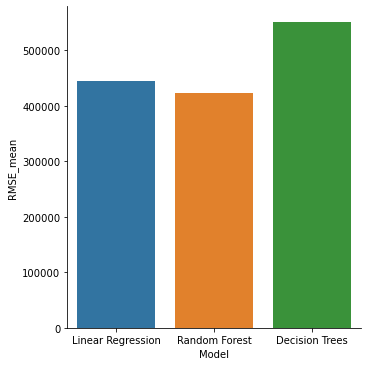

In [13]:
# Plot results
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= model_comparision, kind='bar', legend='True')

__Observations:__

We can clearly see that Random Forest outperformed Linear Regression and Decision Trees. The Root Mean Square Error for all all 10 cross validations, Random Forest has the lowest error. Hence we choose Random Forest as our desired model for predictions.

> In the next section we optimise our Random Forest to perform much better in prediction.